# 安裝Pyspark

In [15]:
!apt-get -y install openjdk-8-jre-headless
!pip install pyspark
from pyspark.sql import SparkSession
from pyspark import SparkContext
spark = SparkSession.builder.master("local").getOrCreate()
sc = SparkContext.getOrCreate()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
openjdk-8-jre-headless is already the newest version (8u312-b07-0ubuntu1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [16]:
rdd = sc.parallelize(["Hello Spark"])
counts = rdd.flatMap(lambda line: line.split(" ")) \
    .map(lambda word: (word, 1)) \
    .reduceByKey(lambda a, b: a + b) \
    .collect()
print(counts)

[('Hello', 1), ('Spark', 1)]


In [17]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd gdrive/My\ Drive/Colab Notebooks/bigdata/HW2/
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: 'gdrive/My Drive/Colab Notebooks/bigdata/HW2/'
/content/gdrive/My Drive/Colab Notebooks/bigdata/HW2
2000.csv  2002.csv  2004.csv  2007.csv	hw2.ipynb
2001.csv  2003.csv  2005.csv  2008.csv


In [18]:
from pyspark.sql import SparkSession
from pyspark import SparkContext
spark = SparkSession.builder.master("airline").getOrCreate()

# Q1: 2007 maximal delays (ArrDelay/DepDelay)

In [19]:
df = spark.read.csv('2007.csv',sep=',',header=True,inferSchema=True)
df.show(10, False)

+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|ActualElapsedTime|CRSElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|CancellationCode|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|
+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|2007|1    |1         |1        |1232   |1225      |1341   |1340      |WN           |2891     

In [20]:
print (df.columns)

['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']


In [35]:
from pyspark.sql.functions import desc

找出出發延遲時間>0的項，依月分加總，再由大到小排序

In [68]:
df1 = df.filter(df.ArrDelay>0)
df1 = df1.groupBy('Month').count()
df1.sort(desc("count")).show()

+-----+------+
|Month| count|
+-----+------+
|    6|295897|
|    3|294556|
|   12|280493|
|    1|279427|
|    2|278902|
|    7|264630|
|    4|256142|
|    5|254673|
|    8|239737|
|   10|183582|
|   11|181506|
|    9|169959|
+-----+------+



In [33]:
df1 = df.groupBy('Month').agg({"ArrDelay":"sum"})
# df1.show()
df1.sort(desc("sum(ArrDelay)")).show()

+-----+-------------+
|Month|sum(ArrDelay)|
+-----+-------------+
|    7|  2.9787755E7|
|    6|  2.9273457E7|
|   12|  2.8387198E7|
|    8|  2.5634905E7|
|    1|  1.9350695E7|
|    3|  1.8177128E7|
|    2|  1.7677022E7|
|    5|  1.4880815E7|
|   11|  1.3944817E7|
|    4|  1.0923485E7|
|   10|  1.0362077E7|
|    9|    5861210.0|
+-----+-------------+



In [34]:
df1 = df.groupBy('Month').agg({"ArrDelay":"mean"})
# df1.show()
df1.sort(desc("avg(ArrDelay)")).show()

+-----+------------------+
|Month|     avg(ArrDelay)|
+-----+------------------+
|   12| 9.505191706395525|
|    6| 9.439898936967818|
|    7| 9.265966020986397|
|    8|  7.91506136626785|
|    1| 6.326686246539656|
|    2| 6.225167153471292|
|    3| 5.727969829186254|
|   11| 4.752403837961521|
|    5| 4.731699057527695|
|    4|3.5584525539550884|
|   10| 3.361293189717672|
|    9| 2.010846724488875|
+-----+------------------+



In [39]:
df2 = df.filter(df.DepDelay>0)
df2 = df2.groupBy('Month').count()
df2.sort(desc("count")).show()

+-----+-------+
|Month|  count|
+-----+-------+
|   12|1307151|
|    7|1305176|
|    6|1260305|
|    8|1235339|
|    3|1148270|
|    1|1109805|
|   11|1025116|
|    2|1020607|
|    5|1020520|
|   10| 996036|
|    4| 982291|
|    9| 818492|
+-----+-------+



In [23]:
df2 = df.groupBy('Month').agg({"DepDelay": "sum"})
# _df1.show()
df2.sort(desc("sum(DepDelay)")).show()


+-----+-------------+
|Month|sum(DepDelay)|
+-----+-------------+
|    6|    9923997.0|
|   12|    9601694.0|
|    7|    9400459.0|
|    8|    8663460.0|
|    2|    7574116.0|
|    3|    7366421.0|
|    1|    6231524.0|
|    4|    6082001.0|
|    5|    5203821.0|
|   10|    4964959.0|
|   11|    4459718.0|
|    9|    3655695.0|
+-----+-------------+



In [24]:
df2 = df.groupBy('Month').agg({"DepDelay": "mean"})
# _df1.show()
df2.sort(desc("avg(DepDelay)")).show()


+-----+------------------+
|Month|     avg(DepDelay)|
+-----+------------------+
|    6|16.214701071994014|
|   12|16.201398473962534|
|    7|14.802613636005757|
|    2| 14.02253123732965|
|    8|13.515875591278409|
|    3|11.836802542694253|
|    1|10.286743415948312|
|    4| 10.07771370814071|
|    5| 8.329205401044868|
|   10| 7.973724233737243|
|   11| 7.446888306310218|
|    9| 6.157685958765665|
+-----+------------------+



# Q2: flights were delayed caused by **security** between 2000~2005 (each year)

In [25]:
path = ['2000.csv','2001.csv','2002.csv','2003.csv','2004.csv','2005.csv']
df = spark.read.csv(path,sep=',',header=True,inferSchema=True)
df.show(10, False)

+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|ActualElapsedTime|CRSElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|CancellationCode|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|
+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|2000|1    |28        |5        |1647   |1647      |1906   |1859      |HP           |154      

In [40]:
df2 = df.filter(df.SecurityDelay>0)
df2.show(5,False)

+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|ActualElapsedTime|CRSElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|CancellationCode|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|
+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|2003|6    |27        |5        |1946   |1640      |2058   |1751      |UA           |888      

In [41]:
dftime = df2.groupBy('Year').agg({"SecurityDelay": "sum"})
dftime.sort(desc("sum(SecurityDelay)")).show()

+----+------------------+
|Year|sum(SecurityDelay)|
+----+------------------+
|2004|          179219.0|
|2005|          141045.0|
|2003|           80663.0|
+----+------------------+



In [42]:
dfyear = df2.groupBy('Year').count()
dfyear.show()

+----+-----+
|Year|count|
+----+-----+
|2003| 3740|
|2004| 8158|
|2005| 6627|
+----+-----+



# Q3: Top 5 airports which occur delays most and least in 2008 (show the IATA airport code)

Origin(DepDelay)和Dest(ArrDelay)應該一起算，occur ->算次數

In [43]:
df = spark.read.csv('2008.csv',sep=',',header=True,inferSchema=True)
df.show(10, False)

+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|ActualElapsedTime|CRSElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|CancellationCode|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|
+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|2008|1    |3         |4        |2003   |1955      |2211   |2225      |WN           |335      

In [49]:
from pyspark.sql.functions import col

In [50]:
dp = df.filter(df.DepDelay>0)
dpdelay=dp.groupBy('Origin').count()
dpdelay = dpdelay.select(col("Origin").alias("Country"), col("count").alias("CountDp"))
dpdelay.show()

+-------+-------+
|Country|CountDp|
+-------+-------+
|    BGM|    128|
|    PSE|    127|
|    MSY|  15229|
|    GEG|   5333|
|    SNA|  17869|
|    BUR|  12233|
|    GRB|   2268|
|    GTF|    399|
|    IDA|    683|
|    GRR|   4598|
|    EUG|   1368|
|    PSG|    329|
|    PVD|   8497|
|    GSO|   3782|
|    MYR|   1198|
|    OAK|  29189|
|    MSN|   4103|
|    COD|    161|
|    FAR|   1085|
|    BTM|    101|
+-------+-------+
only showing top 20 rows



In [51]:
arr = df.filter(df.ArrDelay>0)
arrdelay=arr.groupBy('Dest').count()
arrdelay = arrdelay.select(col("Dest").alias("Country"), col("count").alias("CountArr"))
arrdelay.show()

+-------+--------+
|Country|CountArr|
+-------+--------+
|    BGM|     229|
|    PSE|     310|
|    MSY|   16799|
|    GEG|    7337|
|    BUR|   11903|
|    SNA|   19231|
|    GRB|    3514|
|    GTF|     793|
|    IDA|    1065|
|    GRR|    7453|
|    EUG|    2327|
|    PSG|     311|
|    PVD|    9079|
|    MYR|    2283|
|    GSO|    6150|
|    OAK|   24526|
|    MSN|    6161|
|    COD|     389|
|    FAR|    1859|
|    BTM|     187|
+-------+--------+
only showing top 20 rows



In [52]:
df_concat = dpdelay.join(arrdelay, on='Country')
df_concat.show()

+-------+-------+--------+
|Country|CountDp|CountArr|
+-------+-------+--------+
|    BGM|    128|     229|
|    PSE|    127|     310|
|    MSY|  15229|   16799|
|    GEG|   5333|    7337|
|    BUR|  12233|   11903|
|    SNA|  17869|   19231|
|    GRB|   2268|    3514|
|    GTF|    399|     793|
|    IDA|    683|    1065|
|    GRR|   4598|    7453|
|    EUG|   1368|    2327|
|    PSG|    329|     311|
|    PVD|   8497|    9079|
|    MYR|   1198|    2283|
|    GSO|   3782|    6150|
|    OAK|  29189|   24526|
|    MSN|   4103|    6161|
|    COD|    161|     389|
|    FAR|   1085|    1859|
|    BTM|    101|     187|
+-------+-------+--------+
only showing top 20 rows



In [72]:
from pyspark.sql import functions as F
from pyspark.sql.functions import asc
merge=df_concat.groupBy("Country").agg(F.sum(df_concat.CountDp+df_concat.CountArr))
merge1=merge.sort(desc("sum((CountDp + CountArr))"))
merge1.show(5)
merge2=merge.sort(asc("sum((CountDp + CountArr))"))
merge2.show(5)

+-------+-------------------------+
|Country|sum((CountDp + CountArr))|
+-------+-------------------------+
|    ATL|                   362260|
|    ORD|                   311298|
|    DFW|                   247566|
|    DEN|                   207095|
|    LAX|                   180766|
+-------+-------------------------+
only showing top 5 rows

+-------+-------------------------+
|Country|sum((CountDp + CountArr))|
+-------+-------------------------+
|    TUP|                        3|
|    PIR|                        7|
|    BJI|                       16|
|    INL|                       18|
|    BLI|                       45|
+-------+-------------------------+
only showing top 5 rows



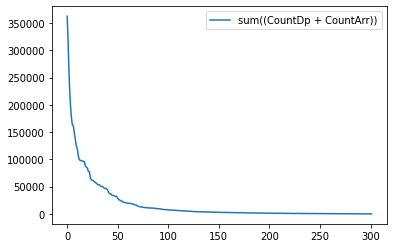

In [66]:
import matplotlib
import matplotlib.pyplot as plt
merge = merge.toPandas()
merge.plot()
plt.show()

In [ ]:
# or df.ArrDelay>0 or WeatherDelay>0 or SecurityDelay